# How US House Prices Got Impacted

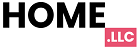

In [62]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [153]:
df = pd.read_csv("house_price_impact.csv")
df.head()

,date,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
0,2004-01-01,141.646,150.0,1709.0,10472.7,5.7,1.00,186.3,1.876868e+08,27.2010,79.75700,48633.000000,63745.000000
1,2004-02-01,143.191,153.4,1718.0,10491.3,5.6,1.01,186.7,1.878746e+08,27.2385,79.77125,48723.666667,63801.833333
2,2004-03-01,145.059,156.5,1794.0,10533.6,5.8,1.00,187.1,1.880565e+08,27.2760,79.78550,48814.333333,63858.666667
3,2004-04-01,146.592,160.1,1938.0,10569.6,5.6,1.00,187.4,1.883187e+08,27.3135,79.79975,48905.000000,63915.500000
4,2004-05-01,148.185,162.7,1893.0,10623.3,5.6,1.00,188.2,1.884768e+08,27.3510,79.81400,49017.666667,63972.333333


### Univariate Analysis:

In [154]:
df = df.set_index('date')

In [155]:
df.head()

,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
date,,,,,,,,,,,,
2004-01-01,141.646,150.0,1709.0,10472.7,5.7,1.00,186.3,1.876868e+08,27.2010,79.75700,48633.000000,63745.000000
2004-02-01,143.191,153.4,1718.0,10491.3,5.6,1.01,186.7,1.878746e+08,27.2385,79.77125,48723.666667,63801.833333
2004-03-01,145.059,156.5,1794.0,10533.6,5.8,1.00,187.1,1.880565e+08,27.2760,79.78550,48814.333333,63858.666667
2004-04-01,146.592,160.1,1938.0,10569.6,5.6,1.00,187.4,1.883187e+08,27.3135,79.79975,48905.000000,63915.500000
2004-05-01,148.185,162.7,1893.0,10623.3,5.6,1.00,188.2,1.884768e+08,27.3510,79.81400,49017.666667,63972.333333


In [133]:
df.columns

Index(['home_price', 'construction_price', 'new_houses_owned',
       'disposable_inc', 'unemp_rate', 'interest_rates', 'cp_index',
       'working_population', 'housing_sub', 'percent_population',
       'gdp_per_cap', 'median_income'],
      dtype='object')

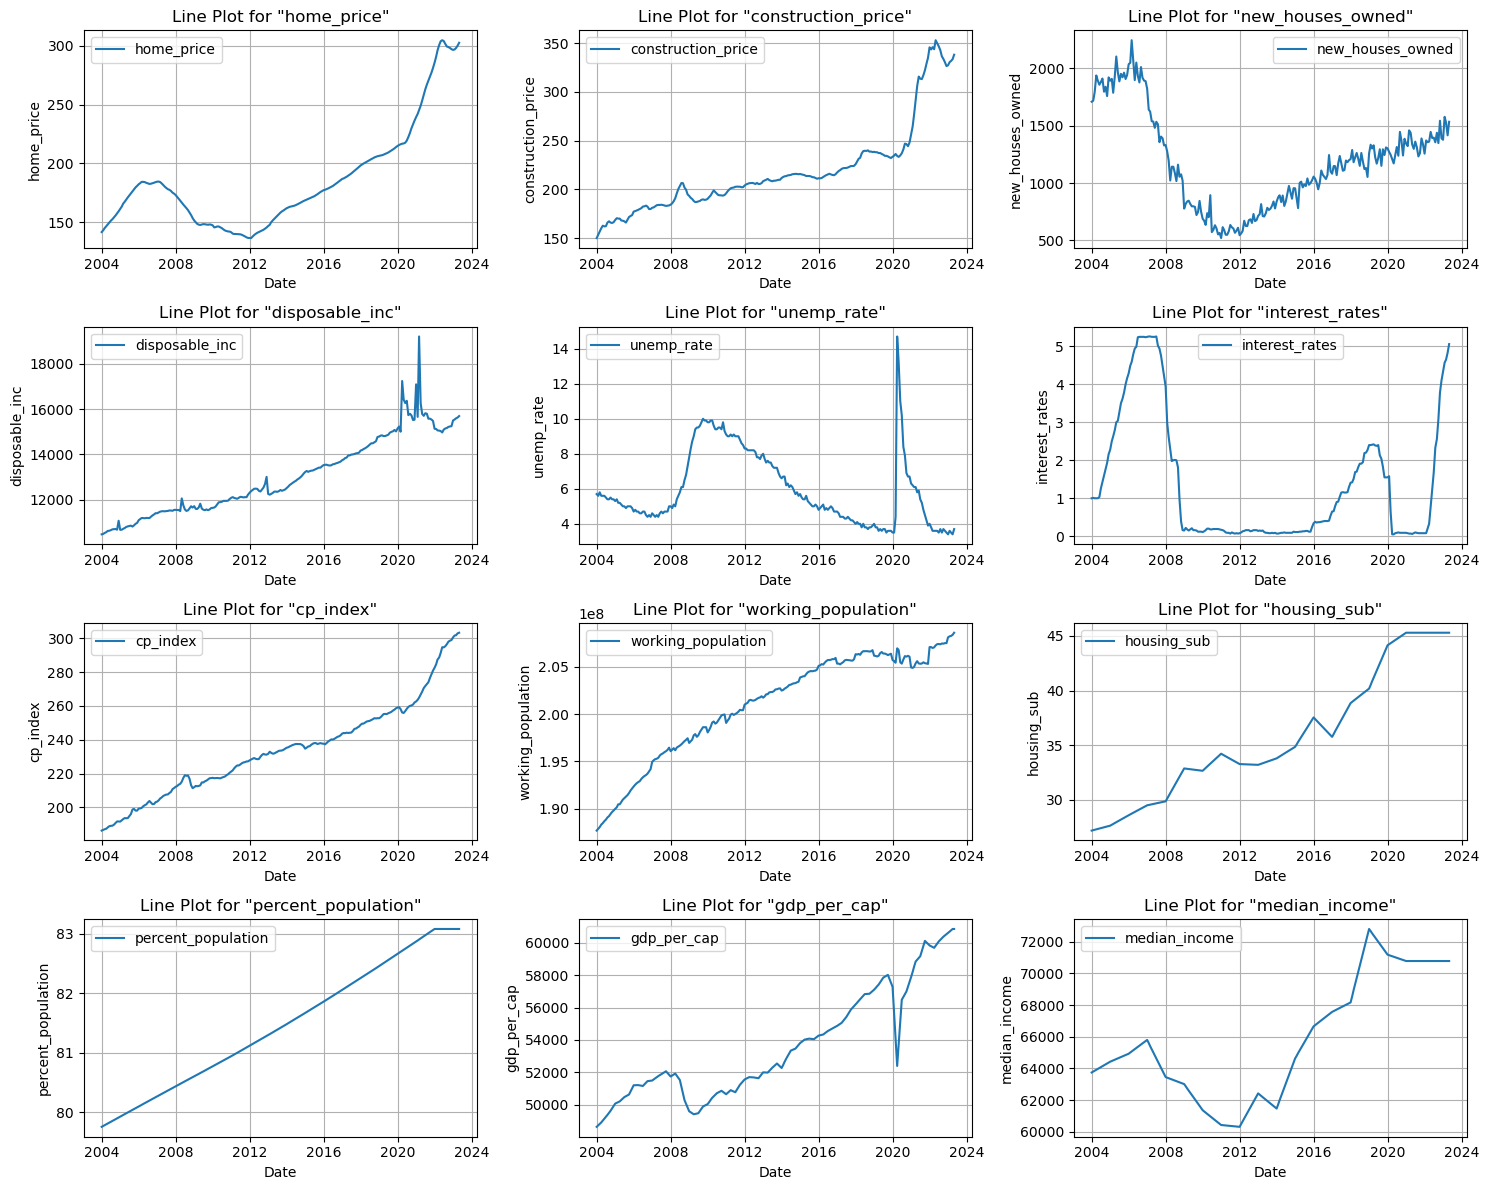

In [150]:
df.index = pd.to_datetime(df.index)

# Define the number of rows and columns for subplots
num_rows = 4  # Number of rows
num_cols = 3  # Number of columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes to iterate through them
axes = axes.flatten()

# Plotting line plots for each column
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.plot(df.index, df[col], label=col)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.set_title(f'Line Plot for "{col}"')
    ax.grid(True)
    ax.legend()

# Remove empty subplots if necessary
for i in range(len(df.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust subplot parameters
plt.tight_layout()

# Show the plot
plt.show()


Inference:
- home_price: After years of falling home values, the data clearly showed that the bleeding stopped somewhere in the first part of 2012 and that home prices have actually begun to slowly rise since then. Other than that, home prices are in showing upward trend. 
- construction_price: About 82.5% of construction materials experienced a significant cost increase since 2020, with an average jump of 19%, according to a construction materials report from construction cost data tracking firm Gordian.
- new_houses_owned: After the housing market got stable in 2012, we started seeing an increase in new house being owned. After that, the trend is upward.
- disposable_inc: data from U.S. national accounts shows that disposable income increased by $1.18 trillion in 2020 due to COVID-19. (www.bls.gov) 
- unemp_rate: Unemployment rate saw a peak after 2008 recession and then, due to COVID in 2020.
- interest_rates: Interest rates also decreased in 2008 due to recession and then due to COVID in 2020.
- cp_index: Consumer Purchase index has more or less an upward trend.
- working_population: Working Population(15-64) has steadily increased.
- gdp_per_cap: GDP per capita has also seen two dips, one in 2008 and then in 2020.
- median_income: Median Income has seen a dip in 2012 which started somewhere around 2008. 

### Bivariate Analysis

In [75]:
df.drop(columns = 'date', inplace = True)   # dropping date column since we won't need it going forward.

In [76]:
df

,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
0,141.646,150.000,1709.0,10472.7,5.7,1.00,186.300,1.876868e+08,27.2010,79.75700,48633.000000,63745.000000
1,143.191,153.400,1718.0,10491.3,5.6,1.01,186.700,1.878746e+08,27.2385,79.77125,48723.666667,63801.833333
2,145.059,156.500,1794.0,10533.6,5.8,1.00,187.100,1.880565e+08,27.2760,79.78550,48814.333333,63858.666667
3,146.592,160.100,1938.0,10569.6,5.6,1.00,187.400,1.883187e+08,27.3135,79.79975,48905.000000,63915.500000
4,148.185,162.700,1893.0,10623.3,5.6,1.00,188.200,1.884768e+08,27.3510,79.81400,49017.666667,63972.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
228,296.601,327.338,1377.0,15504.7,3.4,4.33,300.536,2.081242e+08,45.2960,83.08400,60611.000000,70784.000000
229,296.958,330.532,1577.0,15545.3,3.6,4.57,301.648,2.082332e+08,45.2960,83.08400,60691.333333,70784.000000
230,298.210,331.729,1528.0,15598.6,3.5,4.65,301.808,2.082733e+08,45.2960,83.08400,60771.666667,70784.000000
231,300.214,333.549,1416.0,15633.0,3.4,4.83,302.918,2.083870e+08,45.2960,83.08400,60852.000000,70784.000000


In [66]:
df.corr()

,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
home_price,1.000000,0.897912,0.371875,0.764230,-0.543471,0.230551,0.818245,0.550852,0.799354,0.753031,0.899077,0.843503
construction_price,0.897912,1.000000,-0.030064,0.822475,-0.326781,-0.109269,0.945617,0.744394,0.887811,0.869334,0.908578,0.673933
new_houses_owned,0.371875,-0.030064,1.000000,-0.085502,-0.587359,0.713038,-0.178376,-0.434064,-0.136107,-0.195347,0.091435,0.423272
disposable_inc,0.764230,0.822475,-0.085502,1.000000,-0.240807,-0.227761,0.914036,0.871632,0.966937,0.965271,0.907039,0.807111
unemp_rate,-0.543471,-0.326781,-0.587359,-0.240807,1.000000,-0.534547,-0.285046,-0.158648,-0.212215,-0.268900,-0.539414,-0.615175
interest_rates,0.230551,-0.109269,0.713038,-0.227761,-0.534547,1.000000,-0.197956,-0.372054,-0.256092,-0.291406,0.010168,0.206076
cp_index,0.818245,0.945617,-0.178376,0.914036,-0.285046,-0.197956,1.000000,0.902795,0.953480,0.967240,0.935672,0.698636
working_population,0.550852,0.744394,-0.434064,0.871632,-0.158648,-0.372054,0.902795,1.000000,0.874343,0.943167,0.811058,0.569971
housing_sub,0.799354,0.887811,-0.136107,0.966937,-0.212215,-0.256092,0.953480,0.874343,1.000000,0.973995,0.915522,0.776145
percent_population,0.753031,0.869334,-0.195347,0.965271,-0.268900,-0.291406,0.967240,0.943167,0.973995,1.000000,0.929117,0.752929


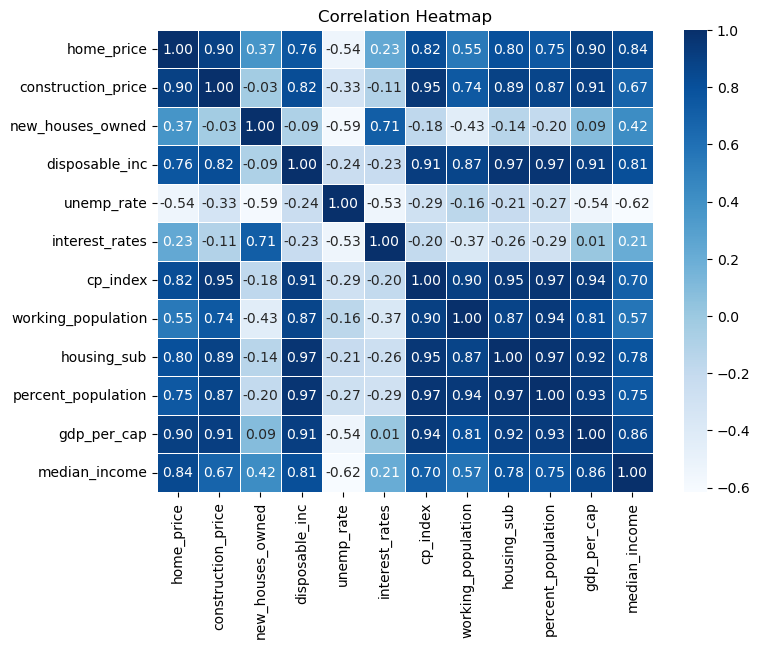

In [67]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Add plot title
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()


In [77]:
# target variable and the independent variables
Y = df.pop("home_price")
X = df

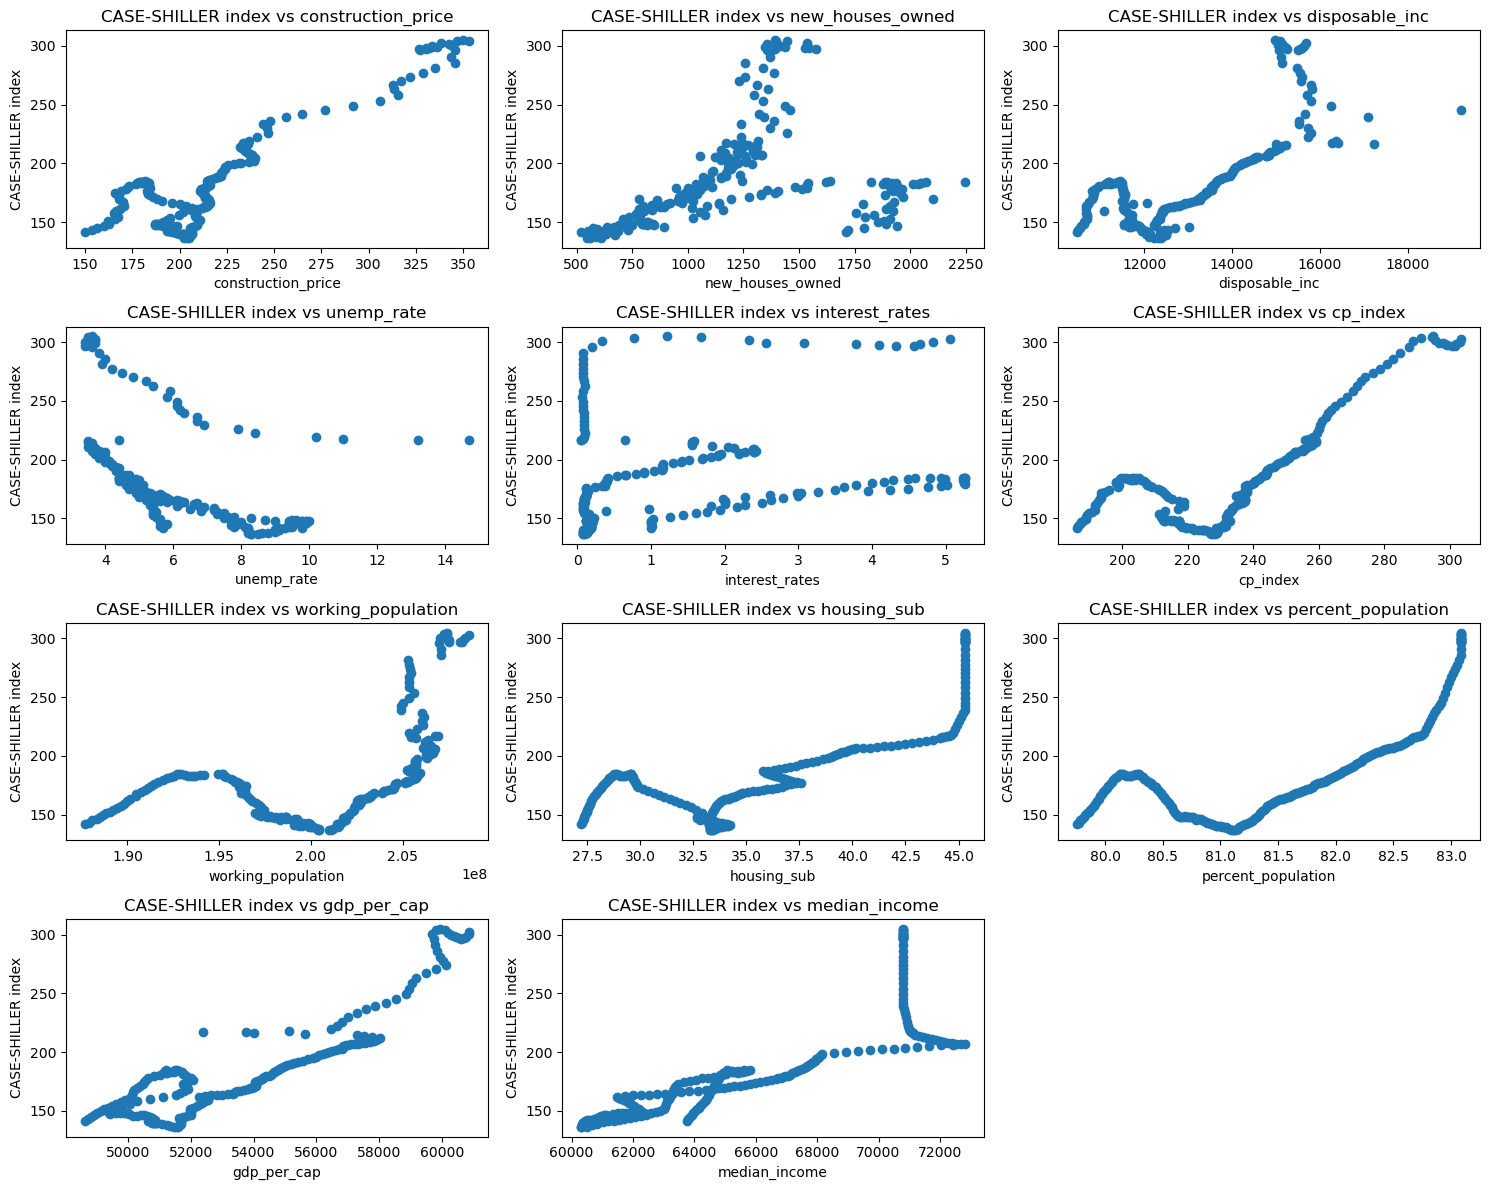

In [69]:
# Define the number of rows and columns for subplots
num_rows = 4  # Number of rows
num_cols = 3  # Number of columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes to iterate through them
axes = axes.flatten()

# Plotting scatter plots for each independent variable
for i, feature in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X[feature], Y)
    ax.set_xlabel(feature)
    ax.set_ylabel("CASE-SHILLER index")
    ax.set_title(f"CASE-SHILLER index vs {feature}")

# Remove empty subplots if necessary
for i in range(len(X.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust subplot parameters
plt.tight_layout()

# Show the plot
plt.show()


Looking at the heatmap and the plots, here are some observations:

- "home_price" has a strong positive correlation with several variables, such as "construction_price," "disposable_inc," "cp_index," "working_population," "housing_sub," "percent_population," "gdp_per_cap," and "median_income." This suggests that these variables tend to increase when "home_price" increases.

- "unemp_rate" has a strong negative correlation with "home_price," indicating that as the unemployment rate increases, home prices tend to decrease.

- "unemp_rate" and "interest_rates" are negatively correlated indicating that as unemployment increases, interest rates tend to decrease.

- "new_houses_owned" has a weak positive correlation with "home_price."

- "interest_rates" has a weak positive correlation with "home_price."

- "unemp_rate" and "median_income" have strong negative correlations with several variables, indicating that these two factors are inversely related to many of the other variables.

There's some multicollinearity in the data. Let's remove some of the variables that'll cause high multicollinearity

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Step 1: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()

# Fit and transform the continuous columns of X_train
X_train = scaler.fit_transform(X_train)
# print(type(X_train))

# Transform the continuous columns of X_test using the fitted scaler
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns=X.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
Y_train_df = pd.DataFrame(Y_train, columns=['home_price']).reset_index(drop=True)
Y_test_df = pd.DataFrame(Y_test, columns=['home_price']).reset_index(drop=True)


# Add a constant column of 1's for statsmodels simple linear regression
X_sm_train = sm.add_constant(X_train_df)
X_sm_test = sm.add_constant(X_test_df)

# Simple Linear Regression - OLS (Ordinary Least Squares)
sm_model = sm.OLS(Y_train_df, X_sm_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1078.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          9.91e-154
Time:                        01:19:56   Log-Likelihood:                -573.62
No. Observations:                 186   AIC:                             1171.
Df Residuals:                     174   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.7480      0

R-squared (R²): R-squared represents the proportion of the variance in the dependent variable (home prices) that is explained by the independent variables in the model. In your case, it's approximately 0.986, indicating that about 98.6% of the variance in home prices is explained by the selected independent variables.

Adjusted R-squared (Adj. R²): Adjusted R-squared takes into account the number of predictors in the model. It penalizes the inclusion of unnecessary variables that don't significantly improve the model's fit. In your case, it's also approximately 0.985, which is very close to R-squared.

While having both R-squared and adjusted R-squared close to each other is generally a good sign, it doesn't automatically rule out multicollinearity.

Let's have a look at the coefficients:

In [83]:
sm_model.params

const                 184.747995
construction_price     27.680239
new_houses_owned       13.533852
disposable_inc         -2.071367
unemp_rate              1.806077
interest_rates          5.160653
cp_index                4.524175
working_population      1.724190
housing_sub            12.320778
percent_population     -9.290161
gdp_per_cap             3.690702
median_income           4.266071
dtype: float64

Let's check multicollinearity.

In [86]:
X_train_df

,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
0,-0.149509,-0.288572,0.333047,-0.555392,-0.634396,0.144789,0.764028,0.366028,0.413176,0.217418,0.274698
1,-0.628209,-1.040620,-0.861632,1.992877,-0.764077,-0.620711,-0.420798,-0.497666,-0.701960,-1.095776,-1.016420
2,2.504942,0.856482,1.571773,-1.192459,1.906168,2.467609,1.341771,1.751874,1.617503,2.167175,1.366312
3,0.333604,-0.009586,2.066065,3.561043,-0.805339,0.804314,1.067053,1.614828,1.272236,0.063947,1.437200
4,2.748131,0.436790,1.302693,-1.094449,0.538625,2.232706,1.179959,1.751874,1.617503,1.989425,1.366312
...,...,...,...,...,...,...,...,...,...,...,...
181,-0.277456,-1.229845,-0.163582,0.865758,-0.740499,-0.087037,0.154366,-0.407822,-0.171248,-0.535448,-0.937796
182,-1.062790,1.484806,-1.353467,-0.359371,0.715463,-1.468252,-1.910624,-1.376597,-1.464766,-1.014045,-0.292975
183,-0.341430,-1.387532,-0.522495,1.502826,-0.787656,-0.255466,-0.120950,-0.340910,-0.376569,-0.738577,-1.393186
184,0.443904,-0.295850,1.077181,-0.996439,0.503258,0.692040,1.066480,0.817689,0.984870,1.041723,1.799396


### Testing the assumptions of Linear Regression

#### 1. Multicollinearity check by VIF score

In [87]:
vif = pd.DataFrame()
X_t = X_train_df
vif['Features'] = X.columns
# # For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
8,percent_population,435.265275
5,cp_index,140.280015
9,gdp_per_cap,84.490765
6,working_population,78.834807
7,housing_sub,67.188362
0,construction_price,39.169478
2,disposable_inc,29.547662
10,median_income,25.643010
1,new_houses_owned,15.413053
4,interest_rates,10.405114


In [88]:
# Let's remove one of the features
cols1 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

X1 = X_train_df[cols1]

X_sm_train1 = sm.add_constant(X1)
sm_model1 = sm.OLS(Y_train_df, X_sm_train1).fit()
print(sm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1184.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          5.19e-155
Time:                        01:27:35   Log-Likelihood:                -574.28
No. Observations:                 186   AIC:                             1171.
Df Residuals:                     175   BIC:                             1206.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.7480      0

In [89]:
# Check the vif score after removing the feature:
vif = pd.DataFrame()
X_t = X_train_df[cols1]
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,cp_index,97.699626
1,gdp_per_cap,65.072030
3,housing_sub,57.431616
4,construction_price,34.582386
2,working_population,34.191919
5,disposable_inc,27.163846
6,median_income,23.100034
7,new_houses_owned,12.875386
9,unemp_rate,8.331562
8,interest_rates,3.091952


In [90]:
# Let's remove one of the features
cols2 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

X2 = X_train_df[cols2]

X_sm_train2 = sm.add_constant(X2)
sm_model1 = sm.OLS(Y_train_df, X_sm_train2).fit()
print(sm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1321.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.51e-156
Time:                        01:28:15   Log-Likelihood:                -574.36
No. Observations:                 186   AIC:                             1169.
Df Residuals:                     176   BIC:                             1201.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.7480      0

In [91]:
# Check the vif score after removing the feature:
vif = pd.DataFrame()
X_t = X_train_df[cols2]
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,gdp_per_cap,65.004364
1,housing_sub,44.987172
4,disposable_inc,27.152200
5,median_income,20.242773
3,working_population,19.422182
2,construction_price,16.236332
6,new_houses_owned,12.404194
7,unemp_rate,8.225798
8,interest_rates,2.853624


In [92]:
# Let's remove one of the features
cols3 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

X3 = X_train_df[cols3]

X_sm_train3 = sm.add_constant(X3)
sm_model3 = sm.OLS(Y_train_df, X_sm_train3).fit()
print(sm_model3.summary())

                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          4.39e-158
Time:                        01:28:45   Log-Likelihood:                -574.52
No. Observations:                 186   AIC:                             1167.
Df Residuals:                     177   BIC:                             1196.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.7480      0

In [93]:
# Check the vif score after removing the feature:
vif = pd.DataFrame()
X_t = X_train_df[cols3]
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,housing_sub,43.813634
1,disposable_inc,22.511491
2,median_income,20.182415
3,working_population,17.206132
5,new_houses_owned,12.349041
4,construction_price,8.872256
6,unemp_rate,5.086702
7,interest_rates,2.602481


In [94]:
# Let's remove one of the features
cols4 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

X4 = X_train_df[cols4]

X_sm_train4 = sm.add_constant(X4)
sm_model4 = sm.OLS(Y_train_df, X_sm_train4).fit()
print(sm_model4.summary())

                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1540.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.25e-155
Time:                        01:29:06   Log-Likelihood:                -584.36
No. Observations:                 186   AIC:                             1185.
Df Residuals:                     178   BIC:                             1211.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.7480      0

In [95]:
# Check the vif score after removing the feature:
vif = pd.DataFrame()
X_t = X_train_df[cols4]
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,disposable_inc,17.843973
2,working_population,17.015400
1,median_income,12.921445
3,new_houses_owned,11.662607
5,unemp_rate,4.077869
4,construction_price,3.605346
6,interest_rates,2.546854


In [96]:
# Let's remove one of the features
cols5 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

X5 = X_train_df[cols5]

X_sm_train5 = sm.add_constant(X5)
sm_model5 = sm.OLS(Y_train_df, X_sm_train5).fit()
print(sm_model5.summary())

                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1800.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          4.09e-157
Time:                        01:29:27   Log-Likelihood:                -584.75
No. Observations:                 186   AIC:                             1184.
Df Residuals:                     179   BIC:                             1206.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.7480      0

In [97]:
# Check the vif score after removing the feature:
vif = pd.DataFrame()
X_t = X_train_df[cols5]
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
0,working_population,12.012452
2,new_houses_owned,11.279028
1,median_income,8.469612
3,unemp_rate,3.248353
4,construction_price,3.083855
5,interest_rates,2.336820


In [98]:
# Let's remove one of the features
cols6 = vif.sort_values(by = "VIF", ascending = False)['Features'][1:]

X6 = X_train_df[cols6]

X_sm_train6 = sm.add_constant(X6)
sm_model6 = sm.OLS(Y_train_df, X_sm_train6).fit()
print(sm_model6.summary())

                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.24e-158
Time:                        01:30:21   Log-Likelihood:                -585.16
No. Observations:                 186   AIC:                             1182.
Df Residuals:                     180   BIC:                             1202.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                184.7480      0

In [99]:
# Check the vif score after removing the feature:
vif = pd.DataFrame()
X_t = X_train_df[cols6]
vif['Features'] = X_t.columns
# For each column index i(feature), we calculate the VIF using variance_inflation_factor(X_t.values, i)
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(len(X_t.columns))]
vif.sort_values(by = "VIF", ascending = False)

,Features,VIF
1,median_income,3.652071
0,new_houses_owned,2.954128
2,unemp_rate,2.831283
3,construction_price,2.368653
4,interest_rates,2.330787


In [102]:
# Predict on the testing data

X_test2 = X_test_df[cols6]
X_sm_test2 = sm.add_constant(X_test2)

Y_pred = sm_model6.predict(X_sm_test2)

# Calculate evaluation metrics
train_r2_score = sm_model6.rsquared 
# test_r2_score = sm_model2.rsquared(X_sm_test2, Y_pred)
test_r2_score = 1 - ((Y_test - Y_pred)**2).sum() / ((Y_test - Y_test.mean())**2).sum()

mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

train_r2_adj = 1 - (1 - train_r2_score) * (X_sm_train6.shape[0] - 1) / (X_sm_train6.shape[0] - X_sm_train6.shape[1] - 1)
test_r2_adj = 1 - (1 - test_r2_score) * (X_sm_test2.shape[0] - 1) / (X_sm_test2.shape[0] - X_sm_test2.shape[1] - 1)

# Print the evaluation metrics
print("Train R-squared:", train_r2_score)
print("Test R-squared:", test_r2_score)
print("Train Adjusted R-squared:", train_r2_adj)
print("Test Adjusted R-squared:", test_r2_adj)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Train R-squared: 0.983620648798413
Test R-squared: 0.8084243420235465
Train Adjusted R-squared: 0.9830716202665163
Test Adjusted R-squared: 0.7796879933270785
Mean Absolute Error (MAE): 4.490758038513283
Root Mean Squared Error (RMSE): 5.507978959619486


The model is showing good results on test data with an Adjusted R-squared of: 0.77 which suggests that the model is explaining a significant portion of the variance in the target variable.

In [105]:
Y_pred_train.shape

(186,)

In [114]:
errors.shape

(222,)

In [108]:
X_sm_train6.shape

(186, 6)

In [112]:
Y_train.shape

(186,)

#### 2. Look for Heteroskedasticity in Data

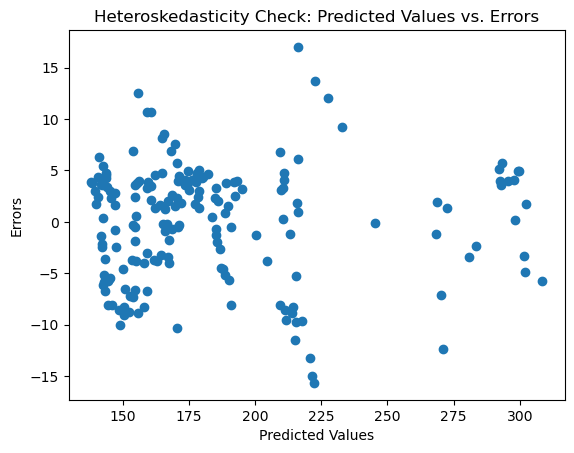

In [116]:
Y_pred_train = sm_model6.predict(X_sm_train6)
errors = Y_train_df['home_price'] - Y_pred_train
plt.scatter(Y_pred_train, errors)
plt.xlabel("Predicted Values")
plt.ylabel("Errors")
plt.title("Heteroskedasticity Check: Predicted Values vs. Errors")
plt.show()

Errors randomly distributed. Variance of errors is more or less constant.

#### 3. Normality of residuals

<Axes: ylabel='Density'>

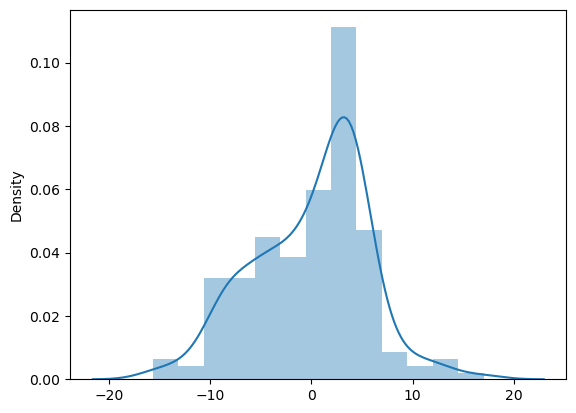

In [157]:
sns.distplot(errors)

Inference:<br>
The plot of the residuals appears to be approximately normally distributed, it suggests that the assumption of normality for the residuals is met. This is a desirable result, as it indicates that the errors in our regression model are normally distributed.

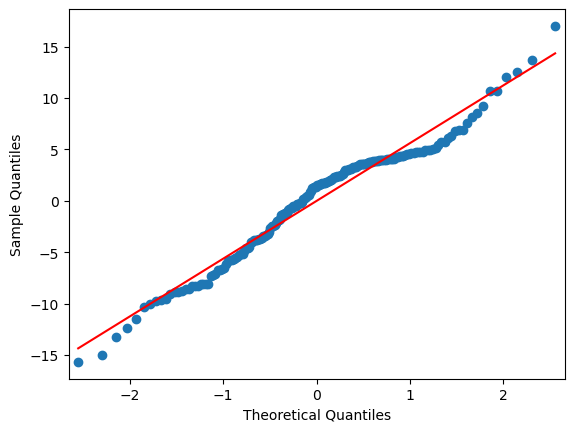

In [118]:
sm.qqplot(errors, line = 's')
plt.show()

The points on the Q-Q plot fall roughly along a straight line, it suggests that the residuals follow a normal distribution. This indicates that the assumption of normality for the residuals is met, which is desirable in linear regression analysis.

#### 4. Mean of residuals is nearly zero

In [119]:
abs(round(errors.mean(),2))

0.0

The mean of the errors is approximately zero (0.0), it suggests that the residuals have been centered around zero, which is desirable in linear regression analysis. A mean value close to zero indicates that, on average, the model is not consistently overestimating or underestimating the observed values.

We can also see the results in the above plot of residuals (distplot) which also tell us that the mean is zero.

#### 5. Linearity of variables

Text(0, 0.5, 'Y_pred')

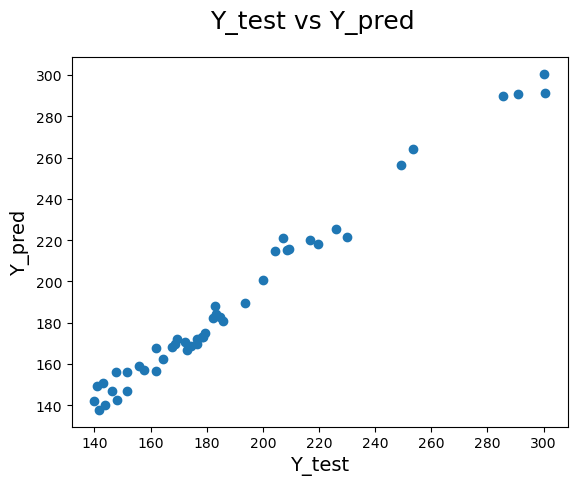

In [120]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize=18)              # Plot heading 
plt.xlabel('Y_test', fontsize=14)                          # X-label
plt.ylabel('Y_pred', fontsize=14)  

The scatter plot of predicted values (y_pred) against actual values (y_test) shows a clear and roughly linear relationship, it provides evidence in support of the linearity assumption in linear regression. The linear relationship suggests that the model's predictions are in line with the actual values, indicating that the predictor variables are linearly related to the target variable.

The relationship between each predictor variable and the target variable is linear ie. the effect of each predictor variable on the target variable is constant across the entire range of values of that predictor variable.

In [101]:
sm_model6.params

const                 184.747995
new_houses_owned       10.668402
median_income           9.696213
unemp_rate              3.026625
construction_price     34.580197
interest_rates          5.999257
dtype: float64

These coefficients indicate the strength and direction of the relationship between each predictor and the target variable. Let's interpret them:
- new_houses_owned: A one-unit increase in the number of new houses owned is associated with an increase of approximately 10.67 units in the target variable (home prices), holding all other variables constant. This is because more new houses means more demand for housing, which drives up prices. The rationale behind this is that an increase in the number of new houses owned can indicate growing demand for housing in an area. When demand exceeds supply, it can lead to an increase in home prices because buyers are willing to pay more for available properties.

- median_income: A one-unit increase in median income is associated with an increase of approximately 9.70 units in home prices, holding all other variables constant. This is because people with higher incomes can afford to pay more for homes.

- unemp_rate: A one-unit increase in the unemployment rate is associated with an increase of approximately 3.03 units in home prices, holding all other variables constant. This suggests that there is a positive relationship between the "unemp_rate" and home prices, but the magnitude of the effect is relatively small. This also seems counter-intuitive. But, there could be some reasons behind this:
    - Lag Effects: The impact of changes in the unemployment rate on the housing market may not be immediate. It's possible that an increase in the unemployment rate is followed by other economic changes, such as government stimulus programs or decreased construction activity, which can influence home prices positively.

    - Local Market Dynamics: Real estate markets are highly localized, and conditions can vary widely from one area to another. In some regions, even when the overall unemployment rate rises, other factors such as a shortage of housing supply or high demand from certain industries (e.g., technology) can keep home prices stable or rising.

    - Investment Behavior: Some investors may view real estate as a relatively safe asset during times of economic uncertainty, including periods of higher unemployment. They may invest in real estate as a hedge against other volatile investments, which can increase demand and prices.

    - Interest Rates: If an increase in the unemployment rate is accompanied by a decrease in interest rates (as can sometimes happen during economic downturns), it may become more affordable for people to buy homes, which could boost demand and prices.

- construction_price: A one-unit increase in construction prices is associated with an increase of approximately 34.58 units in home prices, holding all other variables constant. This suggests that higher construction prices are associated with higher home prices. This is because it costs more to build a house, which is passed on to the buyer in the form of higher prices.

- interest_rates: A one-unit increase in interest rates is associated with an increase of approximately 6.00 units in home prices, holding all other variables constant. This suggests that higher interest rates are still associated with higher home prices. This seems counterintuitive. But, there could be some reasons behind this:
    - Demand and Supply: In some cases, an increase in interest rates can stimulate demand for homes in the short term as potential buyers rush to secure mortgages before rates climb higher. This increased demand can drive up prices.

    - Economic Factors: The relationship between interest rates and home prices can be influenced by broader economic conditions. For example, if interest rates rise during a period of economic growth and low unemployment, people may still be confident in their ability to afford homes, even with higher rates.

    - Investment and Speculation: Higher interest rates can also attract real estate investors and speculators looking for better returns on their investments. This can increase competition for homes and push prices higher.

    - Local Market Dynamics: Real estate markets can vary significantly by location. In some areas of US, factors unique to the local market might drive prices up even when interest rates rise.

**Conclusion:**<br>
Factors affecting the house price are as follows (in decreasing order of their affect):
1. Construction Material Price: As the construction material price has increased over the years, it has significantly increased the house prices. 
2. New Houses Owned: As the number of new houses owned has increased over the years, it has increased the house price with it. This is because more new houses means more demand for housing, which drives up prices.
3. Median Income: An increase in median income is associated with an increase in home prices, holding all other variables constant. This is because people with higher incomes can afford to pay more for homes.
4. Interest rates: An increase in interest rates is associated with an increase in home prices. This is because higher interest rates make it more expensive to borrow money to buy a home, which reduces demand and lowers prices.
5. Unemployment rate: An increase in the unemployment rate is associated with an increase in home prices. Though, the affect is less compared to other variables.

**Here are some more insights:**

- "home_price" has a strong positive correlation with several variables, such as "construction_price," "disposable_inc," "cp_index," "working_population," "housing_sub," "percent_population," "gdp_per_cap," and "median_income." This suggests that these variables tend to increase when "home_price" increases.

- "unemp_rate" has a strong negative correlation with "home_price," indicating that as the unemployment rate increases, home prices tend to decrease.

- "unemp_rate" and "interest_rates" are negatively correlated indicating that as unemployment increases, interest rates tend to decrease.

- "interest_rates" has a weak positive correlation with "home_price" indicating that as home prices increases, interest rates go up.

Further Improvements:
- We could add more features but I couldn't find much data online regarding some more potential features.
- Creating new features (Feature Engineering) may have improved the model.
- Keeping the vif threshold to more than 10 could have been beneficial. We may keep two more features in the final model.
<br><br>But, due to time constraints, I'm leaving it for future improvements.

**Data Source:**
I found most of the data from: https://fred.stlouisfed.org/

You can reach out to me at: https://www.linkedin.com/in/khushalkumar/